# 単変数の構造

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
import arviz as az
from scipy.stats import norm, entropy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## メソッド

In [73]:
def sturges_rule(sample_num: int) -> int:
    '''
    スタージェスの公式。ヒストグラムのbinsを決定する際に使用する。
    
    Parameters
    ----------
    sample_num: int
        サンプル数。
    
    Returns
    -------
    sturges_sample_num: int
        スタージェスの公式によるヒストグラムのサンプル数。
    '''
    sturges_sample_num = int(round(1 + np.log2(sample_num)))
    return sturges_sample_num

## Irisデータセット

In [74]:
df_iris = pd.read_csv('./data/raw/iris.csv')

In [75]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [76]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [77]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [78]:
df_iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

## Describe

### setosa

In [79]:
df_iris_setosa = df_iris.query('species=="setosa"')

In [80]:
df_iris_setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


### virginica

In [81]:
df_iris_virginica = df_iris.query('species=="virginica"')

In [82]:
df_iris_virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


### versicolor

In [83]:
df_iris_versicolor = df_iris.query('species=="versicolor"')

In [84]:
df_iris_versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


## Violin Plot & Swarm Plot

### sepal_length

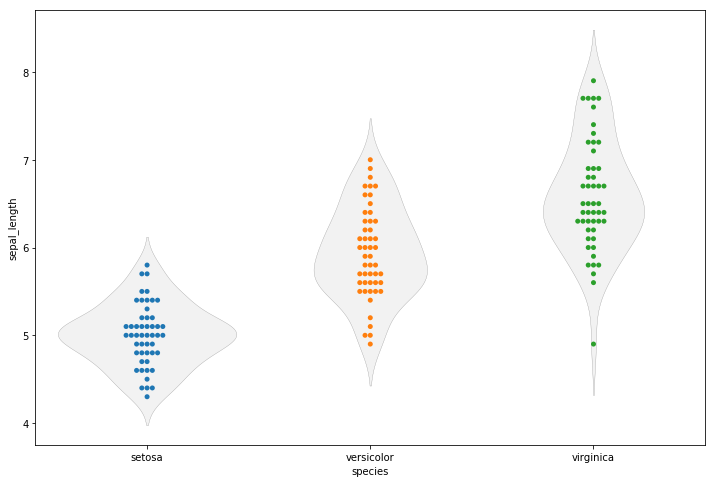

In [85]:
plt.figure(figsize=(12,8), facecolor='w')
sns.violinplot(x=df_iris["species"], y =df_iris["sepal_length"], inner=None, color="0.95", linewidth=0.3)
sns.swarmplot(x=df_iris["species"], y =df_iris["sepal_length"]) 

### sepal_width

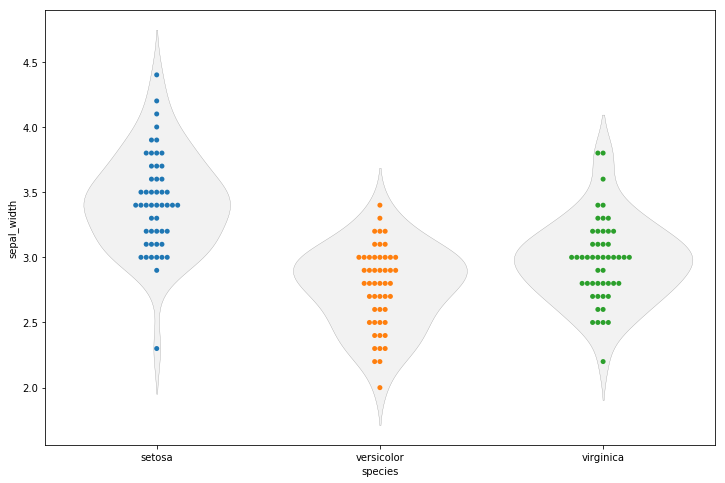

In [86]:
plt.figure(figsize=(12,8), facecolor='w')
sns.violinplot(x=df_iris["species"], y =df_iris["sepal_width"], inner=None, color="0.95", linewidth=0.3)
sns.swarmplot(x=df_iris["species"], y =df_iris["sepal_width"]) 

### petal_length

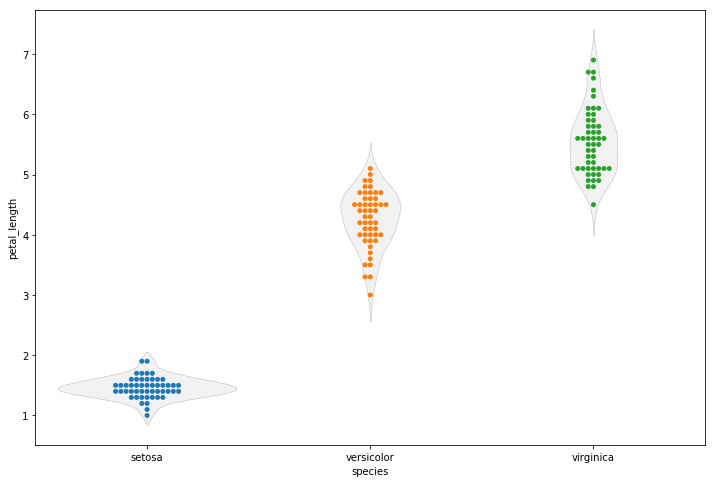

In [87]:
plt.figure(figsize=(12,8), facecolor='w')
sns.violinplot(x=df_iris["species"], y =df_iris["petal_length"], inner=None, color="0.95", linewidth=0.3)
sns.swarmplot(x=df_iris["species"], y =df_iris["petal_length"]) 

### petal_width

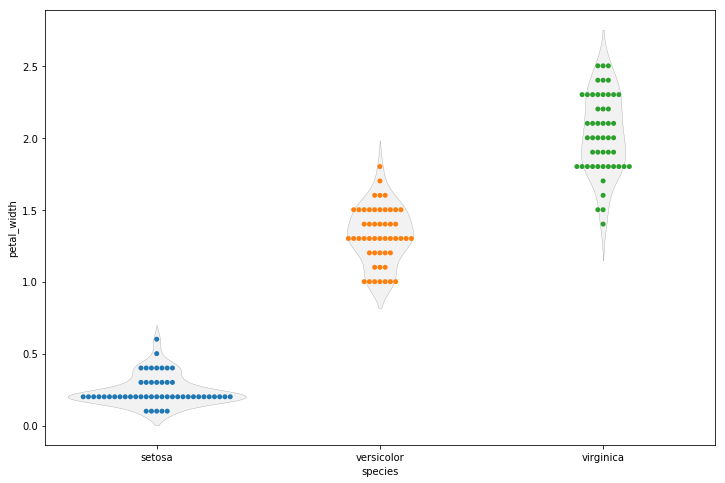

In [88]:
plt.figure(figsize=(12,8), facecolor='w')
sns.violinplot(x=df_iris["species"], y =df_iris["petal_width"], inner=None, color="0.95", linewidth=0.3)
sns.swarmplot(x=df_iris["species"], y =df_iris["petal_width"]) 

## Histgram
Find differences in sample distribution by label

In [89]:
bins = sturges_rule(len(df_iris))

### sepal_length

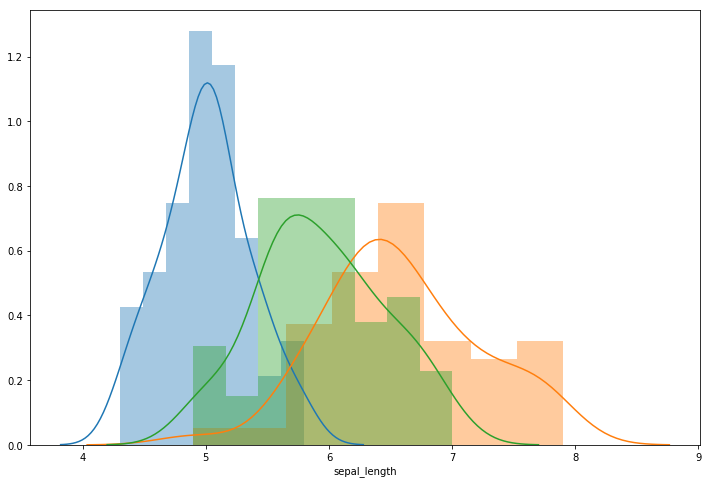

In [90]:
plt.figure(figsize=(12,8), facecolor='w')
sns.distplot(df_iris_setosa['sepal_length'], kde=True, rug=False, bins=bins) 
sns.distplot(df_iris_virginica['sepal_length'], kde=True, rug=False, bins=bins) 
sns.distplot(df_iris_versicolor['sepal_length'], kde=True, rug=False, bins=bins) 

### sepal_width

In [93]:
plt.figure(figsize=(12,8), facecolor='w')
sns.distplot(df_iris_setosa['sepal_width'], kde=True, rug=False, bins=bins)
sns.distplot(df_iris_virginica['sepal_width'], kde=True, rug=False, bins=bins)
sns.distplot(df_iris_versicolor['sepal_width'], kde=True, rug=False, bins=bins)

AttributeError: 'function' object has no attribute 'figure'

### petal_length

In [92]:
def plt():
    plt.figure(figsize=(12,8), facecolor='w')
    sns.distplot(df_iris_setosa['petal_length'], kde=True, rug=False, bins=bins) 
    sns.distplot(df_iris_virginica['petal_length'], kde=True, rug=False, bins=bins) 
    sns.distplot(df_iris_versicolor['petal_length'], kde=True, rug=False, bins=bins) 
plt()



AttributeError: 'function' object has no attribute 'figure'

### petal_width

In [70]:
plt.figure(figsize=(12,8), facecolor='w')
sns.distplot(df_iris_setosa['petal_width'], kde=True, rug=False, bins=bins) 
sns.distplot(df_iris_virginica['petal_width'], kde=True, rug=False, bins=bins) 
sns.distplot(df_iris_versicolor['petal_width'], kde=True, rug=False, bins=bins) 

AttributeError: 'function' object has no attribute 'figure'